In [ ]:
import torch
import torch.nn as nn
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image
import cv2
device = torch.device('cpu')

In [ ]:
class MissingPipeNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        # Feature extraction backbone
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),
            #
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
            #
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
            #
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
            #
            nn.AdaptiveAvgPool2d(2),
        )

        # Classification head
        self.classifier = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 40),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.classifier(x)
        return x.view(-1, 4, 10)  # Reshape to [batch, 4, 10]


model = MissingPipeNetwork().to(device)
model.load_state_dict(torch.load('./checkpoints/pipe_detector.pth', weights_only=True))

tensor([[[1., 1., 1., 1., 1., 0., 1., 1., 0., 1.],
         [1., 1., 1., 1., 1., 0., 1., 1., 0., 1.],
         [1., 1., 1., 1., 1., 0., 1., 1., 0., 1.],
         [1., 1., 1., 1., 1., 0., 1., 1., 0., 1.]]], grad_fn=<RoundBackward0>)


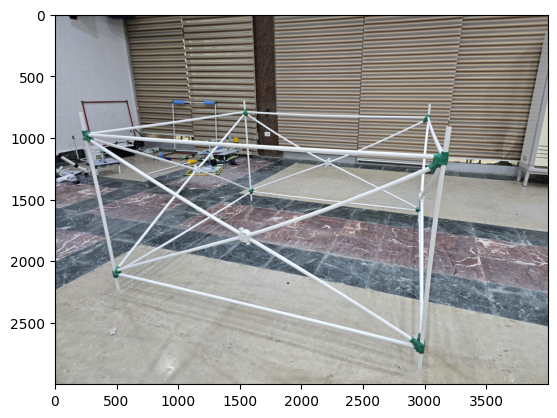

In [44]:
model.eval()

# transform = transforms.Compose([
#     transforms.Resize((256, 256)),
#     transforms.PILToTensor(),                # uint8 [0–255]
#     transforms.ConvertImageDtype(torch.float),  # now float32 [0–255]
#     transforms.Lambda(lambda x: x / 255.0),     # float32 [0–1]
#     transforms.Normalize(
#         mean=[0.485, 0.456, 0.406],
#         std= [0.229, 0.224, 0.225],
#     ),
# ])

transform = transforms.Compose(
    [
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

img = Image.open('./data/real/6.jpeg').convert("RGB")
img_t = transform(img).unsqueeze(0)

result = model(img_t)
print(torch.sigmoid(result).round())
plt.imshow(img)